In [ ]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
import pandas as pd
df=pd.read_csv('/content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

histogram

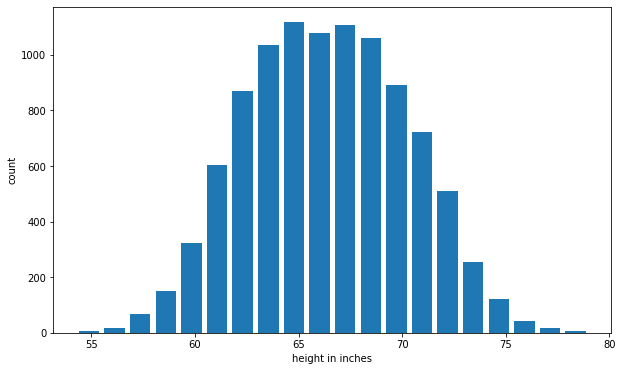

In [ ]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel('height in inches')
plt.ylabel('count')
plt.show()

Plotting bell curve along with histogram for our dataset

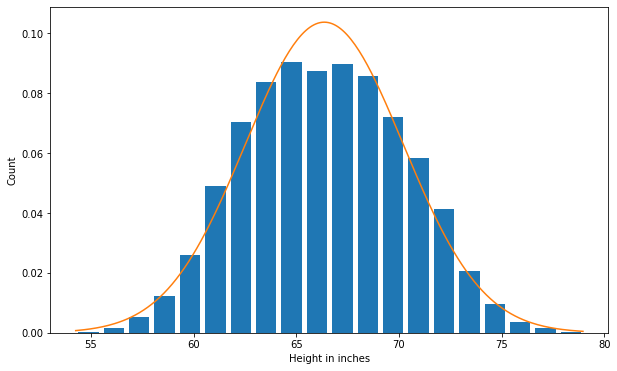

In [ ]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height in inches')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [ ]:
df.Height.mean()

66.36755975482106

In [ ]:
df.Height.std()

3.847528120773233

removing outliers using 3 standard deviation

In [ ]:
upper_limit = df.Height.mean() + 3*df.Height.std()
print('upper limit: ',upper_limit)
lower_limit=df.Height.mean()-3*df.Height.std()
print('lower limit: ',lower_limit)

upper limit:  77.91014411714076
lower limit:  54.82497539250136


here are the list of outliers beyond 3 standard deviation

In [ ]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


removing the outliers

In [ ]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
print('before removing outliers: ',df.shape)
print('after removing outliers: ',df_no_outlier_std_dev.shape)

before removing outliers:  (10000, 3)
after removing outliers:  (9993, 3)


removing outliers using z score method


In [ ]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


Get data points that has z score higher than 2 or lower than -2. 

In [ ]:
df[df['zscore']>2]

,Gender,Height,Weight,zscore
2,Male,74.110105,212.740856,2.012343
23,Male,75.205974,228.761781,2.297167
190,Male,76.709835,235.035419,2.688031
197,Male,75.944460,231.924749,2.489105
202,Male,75.140821,224.124271,2.280233
...,...,...,...,...
4807,Male,74.529455,225.540079,2.121335
4825,Male,74.975231,214.495489,2.237195
4843,Male,74.650540,213.320520,2.152806
4883,Male,74.210521,204.759344,2.038442


In [ ]:
df[df['zscore']<-2]

,Gender,Height,Weight,zscore
4794,Male,58.406905,121.338323,-2.069031
5014,Female,58.438249,98.192621,-2.060884
5026,Female,56.547975,84.872124,-2.552180
5074,Female,56.159458,90.815256,-2.653158
5122,Female,57.103869,93.506316,-2.407699
...,...,...,...,...
9825,Female,55.979198,85.417534,-2.700009
9895,Female,57.740192,93.652957,-2.242314
9904,Female,57.028857,101.202551,-2.427195
9913,Female,58.351003,110.122151,-2.083560


list of all outliers

In [ ]:
df[(df.zscore<-2) | (df.zscore>2)]

,Gender,Height,Weight,zscore
2,Male,74.110105,212.740856,2.012343
23,Male,75.205974,228.761781,2.297167
190,Male,76.709835,235.035419,2.688031
197,Male,75.944460,231.924749,2.489105
202,Male,75.140821,224.124271,2.280233
...,...,...,...,...
9825,Female,55.979198,85.417534,-2.700009
9895,Female,57.740192,93.652957,-2.242314
9904,Female,57.028857,101.202551,-2.427195
9913,Female,58.351003,110.122151,-2.083560


removing all outliers

In [ ]:
df_no_outliers = df[(df.zscore>-2) & (df.zscore<2)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
5,Male,67.253016,152.212156,0.230136


In [ ]:
print('before removing outliers: ',df.shape)
print('after removing outliers: ',df_no_outliers.shape)

before removing outliers:  (10000, 4)
after removing outliers:  (9652, 4)
